Abalone is marine snail The shells of abalones have a low, open spiral structure, and are characterized by several open respiratory pores in a row near the shell's outer edge. The thick inner layer of the shell is composed of nacre (mother-of-pearl), which in many species is highlyiridescent, giving rise to a range of strong, changeable colors, which make the shells attractive to humans as decorative objects, jewelry, and as a source of colorful mother-of-pearl.

In [1]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,r2_score,mean_absolute_error
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
#read the file and see top data
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#add 1.5 in Ring column will give Age data column
data['Age']=data.Rings+1.5

In [4]:
data['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [5]:
data  #so now Age column is added as per addition of 1.5 in Rings so remove Rings column 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [6]:
data.drop(columns="Rings",axis=1,inplace=True)

In [7]:
data.head()  # now dataset is ready to proceed further

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [8]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


no Nan and not much deviation in dataset lets proceed further

In [9]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB
None
(4177, 9)


    Sex column is object  lets encode into numbers

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label=LabelEncoder()

In [12]:
data['Sex']=label.fit_transform(data['Sex'])  # label encoder will convert sex column F=0,I=1,M=2 .

In [13]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [14]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

no null values

<AxesSubplot:xlabel='Sex', ylabel='count'>

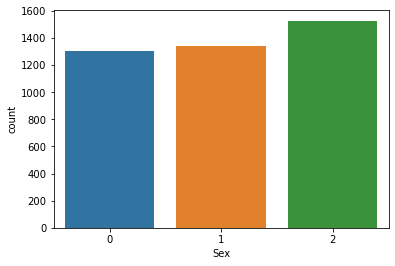

In [15]:
sns.countplot(data['Sex']) #Sex is categorical data so lets see how its distributed F=0,I=1,M=2

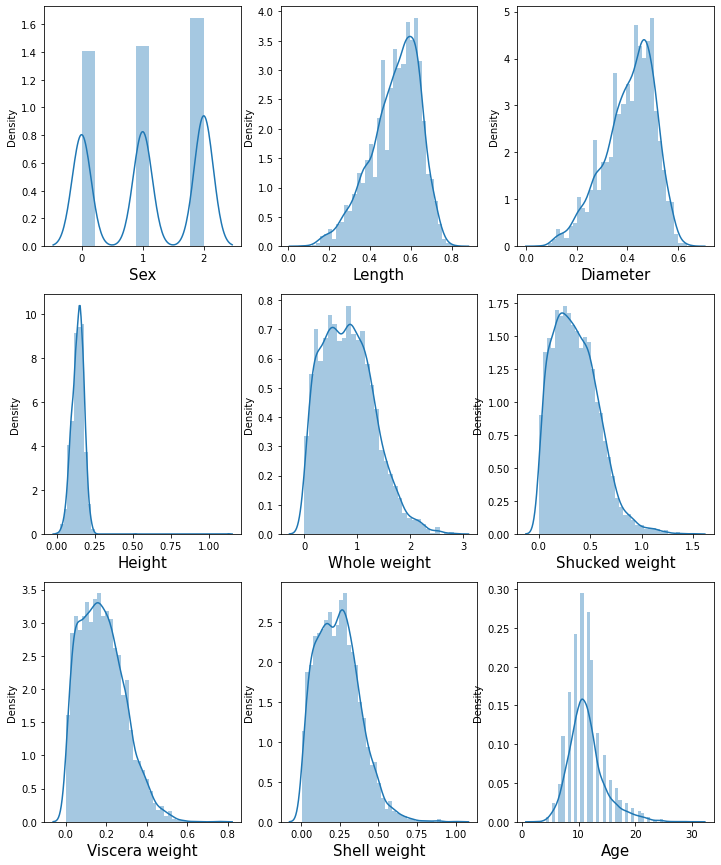

In [16]:
#visualize data distribution and check skewness
plt.figure(figsize=(12,15))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3 ,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
    
plt.show()

'Height' ,'Shell weight'column  data is skewed ,remove skewed data from Height, Shell weight

In [17]:
q=data['Height'].quantile(0.98)
clean_data=data[data['Height']<q]
q=clean_data['Shell weight'].quantile(.99)
clean_data=clean_data[clean_data['Shell weight']<q]

<AxesSubplot:xlabel='Height', ylabel='Density'>

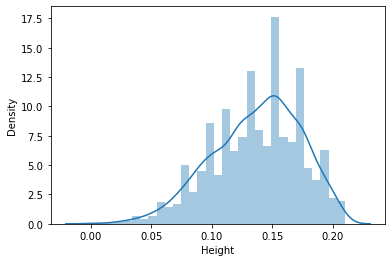

In [18]:
#after removing skewed data lets see through plot
sns.distplot(clean_data['Height'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

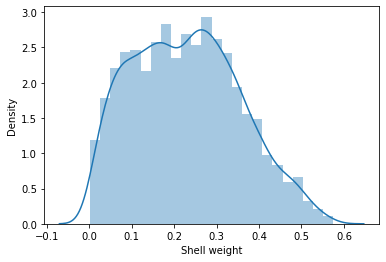

In [19]:
sns.distplot(clean_data['Shell weight'])

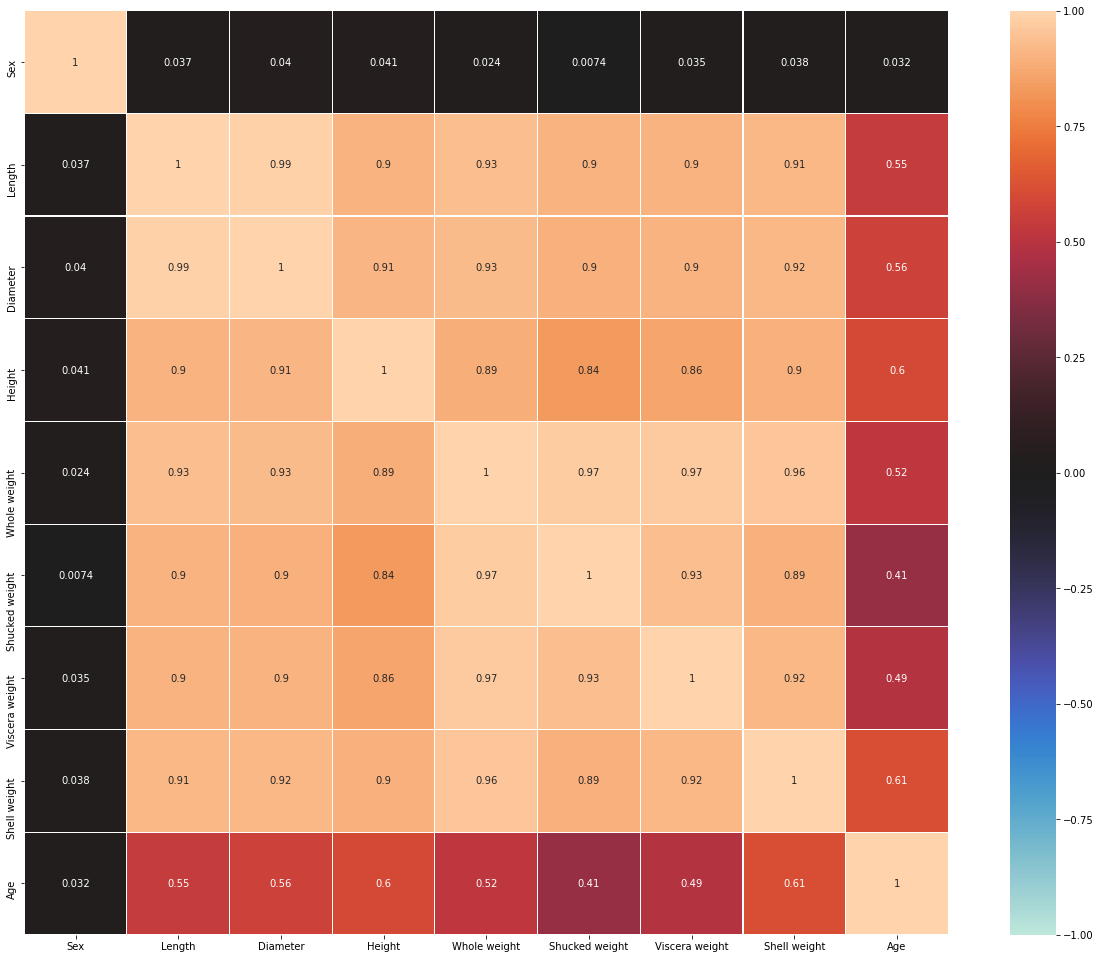

In [20]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=clean_data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

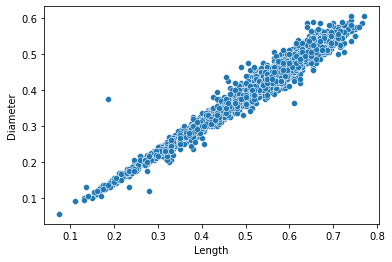

In [21]:
sns.scatterplot(x='Length',y='Diameter', data=clean_data)

so as per scatter plot Diameter and Length are highly correlated eachother ,will drop one features

<AxesSubplot:xlabel='Whole weight', ylabel='Shucked weight'>

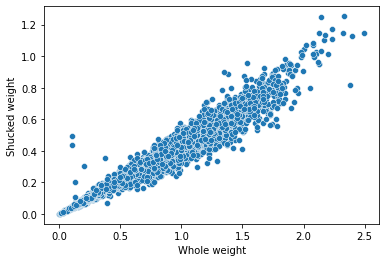

In [22]:
sns.scatterplot(x='Whole weight',y='Shucked weight',data=clean_data)

<AxesSubplot:xlabel='Viscera weight', ylabel='Whole weight'>

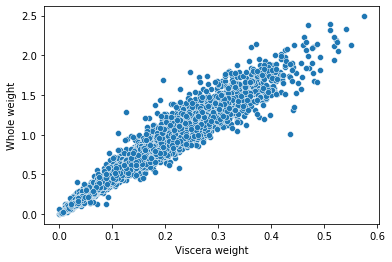

In [23]:
sns.scatterplot(x='Viscera weight',y='Whole weight',data=clean_data)

<AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>

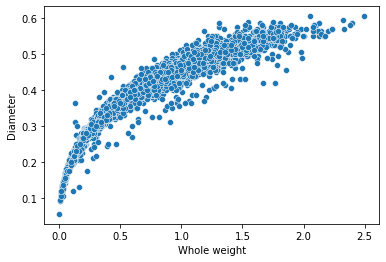

In [24]:
sns.scatterplot(x='Whole weight',y='Diameter',data=clean_data)

In [25]:
corr_matrix=clean_data.corr()
corr_matrix['Age'].sort_values(ascending=False)

Age               1.000000
Shell weight      0.609593
Height            0.595590
Diameter          0.564266
Length            0.546313
Whole weight      0.521930
Viscera weight    0.489125
Shucked weight    0.407412
Sex              -0.031792
Name: Age, dtype: float64

so i will drop column ''Length','Whole weight' as per scatter plot show strong correlation 

In [26]:
clean_data.drop(['Length','Whole weight'],axis=1,inplace=True)


In [27]:
clean_data

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.365,0.095,0.2245,0.1010,0.1500,16.5
1,2,0.265,0.090,0.0995,0.0485,0.0700,8.5
2,0,0.420,0.135,0.2565,0.1415,0.2100,10.5
3,2,0.365,0.125,0.2155,0.1140,0.1550,11.5
4,1,0.255,0.080,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.3700,0.2390,0.2490,12.5
4173,2,0.440,0.135,0.4390,0.2145,0.2605,11.5
4174,2,0.475,0.205,0.5255,0.2875,0.3080,10.5
4175,0,0.485,0.150,0.5310,0.2610,0.2960,11.5


In [28]:
#now divide clean data into features and lable
X=clean_data.drop(["Age"],axis=1)
Y=clean_data.Age

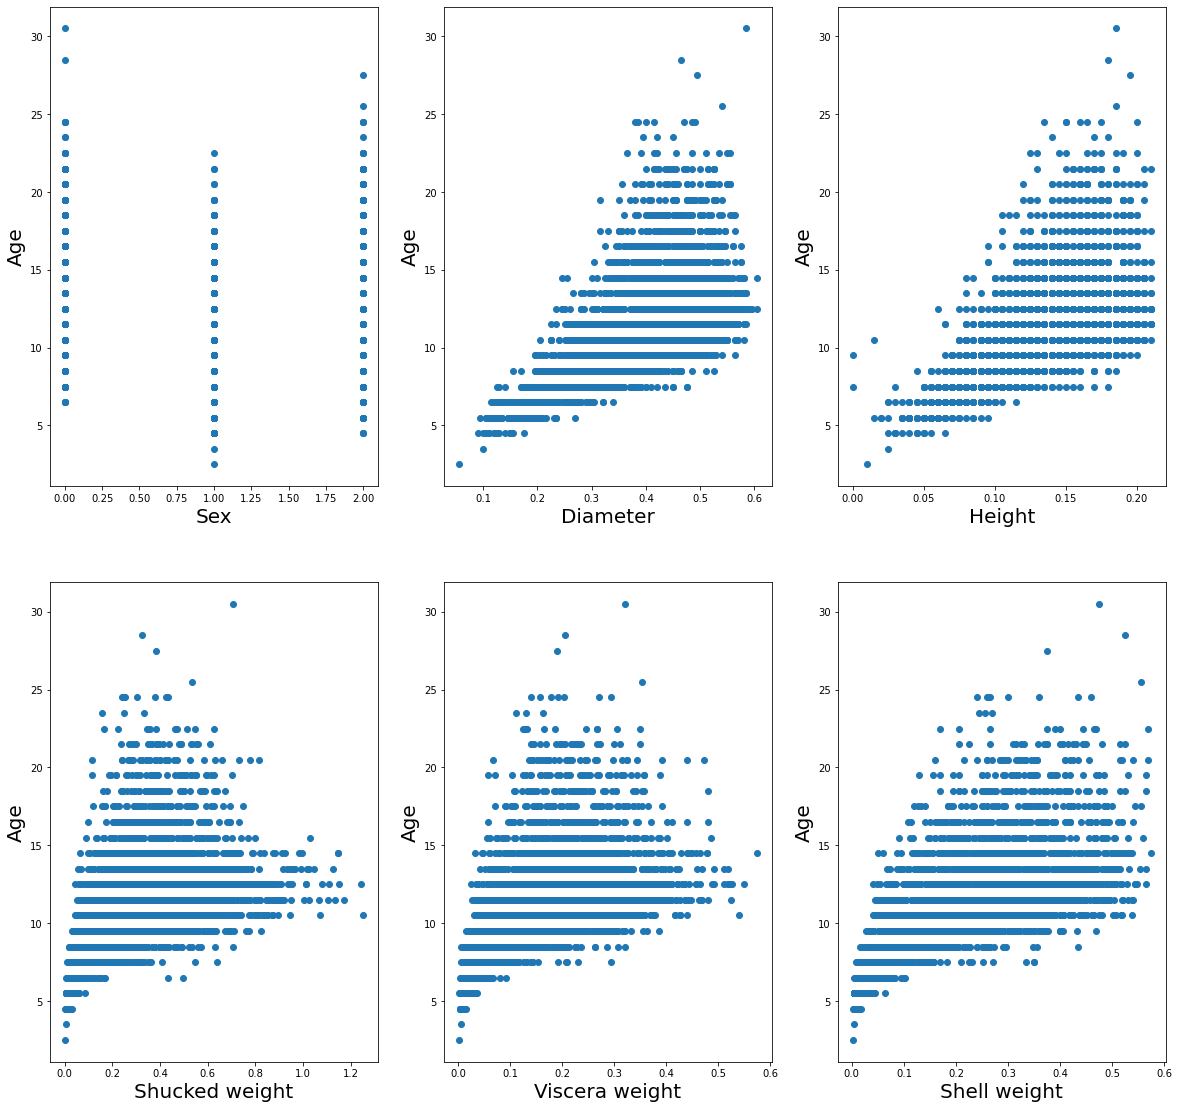

In [29]:
#visulazing relationship 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column ,fontsize=20)
        plt.ylabel('Age',fontsize=20)
        plotnumber+=1
plt.show()

Length , Diameter,Height, Whole Weight,Shucked weight,Viscera weight,Shell weightcolumn have linear relationship with class

In [30]:
#scale the features data
sclaer=StandardScaler()
X_scaled=sclaer.fit_transform(X)

In [31]:
#train test split data set
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=.25,random_state=100)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test)

In [35]:
lr.score(x_train,y_train)

0.4884456288576954

In [36]:
lr.score(x_test,y_test)

0.5281752000508451

In [37]:
#score is low so lets do regulrization of model with lasso 
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV 

In [38]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)  

LassoCV(max_iter=100, normalize=True)

In [39]:
alpha=lassocv.alpha_
alpha

6.388892874949727e-05

In [40]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.388892874949727e-05)

In [41]:
lasso_reg.score(x_train,y_train)

0.4884456172941828

In [42]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [43]:
ridgecv.alpha_

0.001

In [44]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [45]:
ridge_model.score(x_train,y_train)

0.48844562885624454

In [46]:
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(lr, open(filename,'wb'))

In [47]:
mean_absolute_error(y_test,y_pred)

1.5267420378363892

model score is low .50 and not performing with Linear regression lets try with Decesion tree and ensamble method

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# DecesionTree Regression

In [49]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
dt.score(x_train,y_train)

1.0

Training data we got 100% score cances of overfitting of model

In [51]:
y_pred=dt.predict(x_test)

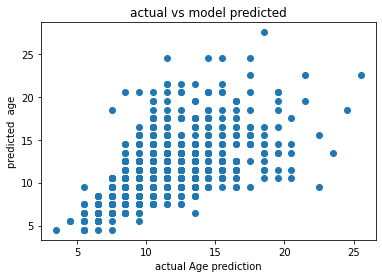

In [52]:
#scatter plot to see predict vs test data
plt.scatter(y_test,y_pred)
plt.xlabel('actual Age prediction')
plt.ylabel('predicted  age')
plt.title('actual vs model predicted')
plt.show()

In [53]:
mean_absolute_error(y_test,y_pred)

1.9743336623889438

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_param={'criterion':['mse'],
           'max_depth': range(2,10,3),
           'min_samples_leaf':range(1,10,2),
           'min_samples_split':range(2,10,2)}

In [59]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [61]:
best_parametrs=grid_search.best_params_
best_parametrs

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [62]:
dt=DecisionTreeRegressor(criterion= 'mse',max_depth=9,min_samples_leaf=1,min_weight_fraction_leaf=0.001,splitter='best')


In [63]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, min_weight_fraction_leaf=0.001)

In [64]:
dt.score(x_train,y_train)

0.7079482908200558

I have tune best parameter to improve score tried diffrent max_depth and min_weight_fraction=.001 to provide small step for learning rate so model can learn gradually better way

In [65]:
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(dt, open(filename,'wb'))

# RandomForest Regression

In [66]:
#RandomForestRegressor model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [67]:
y_pred=rfr.predict(x_test)

In [68]:
rfr.score(x_train,y_train)

0.9271768413727121

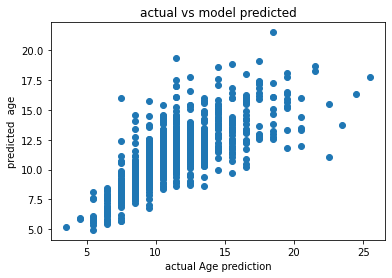

In [69]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Age prediction')
plt.ylabel('predicted  age')
plt.title('actual vs model predicted')
plt.show()

# Hyperparameter Tuning

In [70]:
param_grid = {  'bootstrap': [True],
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [71]:
 regr = RandomForestRegressor(max_depth=16, random_state=0,
                              n_estimators=100)

In [72]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=16, random_state=0)

In [73]:
grid_search=GridSearchCV(estimator=regr,param_grid=param_grid,cv=3)

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=16, random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [75]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 15}

In [76]:
regr=RandomForestRegressor(bootstrap=True,max_depth=13)

In [77]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=13)

In [78]:
regr.score(x_train,y_train)

0.8978711278915191

In [79]:
y_pred=regr.predict(x_test)

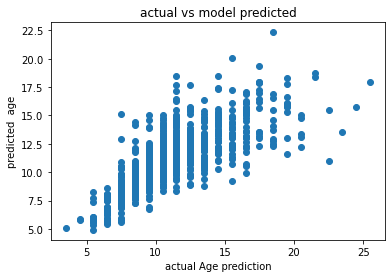

In [80]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Age prediction')
plt.ylabel('predicted  age')
plt.title('actual vs model predicted')
plt.show()

In [131]:
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(regr, open(filename,'wb'))

# GradientBoosting Regression

In [82]:
grb=GradientBoostingRegressor()

In [83]:
grb.fit(x_train,y_train)

GradientBoostingRegressor()

In [84]:
grb.score(x_train,y_train)

0.6314538704346278

In [85]:
y_pred=grb.predict(x_test)

# HYperParameter Tuning

In [86]:
 parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,100,150,200],
                  'max_depth'    : [4,6,8,10]
                 }

In [87]:
grid_search=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=parameters)

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [89]:
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.2}

In [126]:
grb=GradientBoostingRegressor(learning_rate=0.03,max_depth=6,n_estimators=300,subsample=.9)

In [127]:
grb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=300,
                          subsample=0.9)

In [128]:
grb.score(x_train,y_train)

0.8276688280968466

In [129]:
y_pred=grb.predict(x_test)

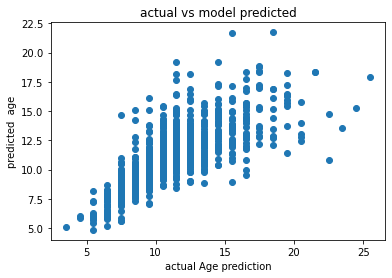

In [130]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Age prediction')
plt.ylabel('predicted  age')
plt.title('actual vs model predicted')
plt.show()

In [132]:
#saving model 
import pickle
filename='finalized_model.pickel'
pickle.dump(grb, open(filename,'wb'))